$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\vc}[1]{\begin{pmatrix}#1_1\\#1_2\end{pmatrix}}
\newcommand{\vd}[1]{\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\ffud}[2]{\frac{\mathrm{d}^2 #1}{\mathrm{d} #2^2}}
\newcommand{\dd}{\,\mathrm{d}}
$$

# Stokes 1<sup>st</sup> Problem "Accelerated Plate"


An infinite long plate lies along $y=0$ and is surrounded by a quiescent fluid with constant density $\rho$ and viscosity $\mu$. At time $t=0$ the plate is impulsively accelerated to the velocity $U$. The pressure at $x=\pm\infty$ is maintained constant.
What is the velocity in the liquid as a function of $y$ and $t$.

<div class="Figure">
<img src="pics/stokes1sproblem.png" width=350px>
Figure 1: Plate moves with constant velocity $U$ from time $t\ge0$.
</div>

1. The flow is invariant under translation in $x$-direction. Thus it can't depend on $x$ and therefore all derivatives $\pad{}{x}=0$. 
2. Because $\pad{u}{x}+\pad{v}{y}=0$ and the first term $0$ the second term $\pad{v}{y}=0$. As the velocity $v(y=0)=0$ it is $v=0$ everywhere.


Now we have a look at the Navier Stokes equations. We obtain

\begin{eqnarray}
\rho \pad{u}{t} &=& -\pad{p}{x} + \mu \ppad{u}{y}\tag{1}\\
0 &=& -\pad{p}{y}\tag{2}
\end{eqnarray}

Equation (2) immediately gives $p=p(x)$ and as $p\ne p(x)$ the pressure must be constant in the domain.

Thus Eq. (1) becomes 

$$
\pad{u}{t}=\nu\ppad{u}{y}\tag{3}\quad ,
$$

with the boundary conditions 

\begin{eqnarray}
u(y,t<0) &=& 0\tag{4a}\\
u(y=0,t\ge 0) &=& U\tag{4b}\\
u(y\rightarrow\infty , t)&=&0\tag{4c}
\end{eqnarray}

We can form a non-dimensional velocity, $u'=u/U$. We assume that this nondimensional velocity depends on a nondimensional distance from the wall, say $u'=u'(\eta)$, where $\eta$ is a nondimensional variable. Because we have no direct lengthscale in the problem, the only length we can form is by the expression $\sqrt{\nu t}$. 

$$\frac{u}{U}=F\left(\frac{y}{\sqrt{\nu t}}\right)\equiv F(\eta)$$

This choice of non-dimensional variable reduces the solution space from 2 $(y,t)$ to 1, namely $\eta=y/\sqrt{\nu t}$ and we can therefore rewrite the PDE into an ODE. $\eta$ is called the similarity variable. Now Eq. (3) is rewritten in $\eta$. For this we need to write the derivatives with respect to $\eta$.

$$
\pad{u}{t}=U\fud{F}{t}=U\fud{F}{\eta}\pad{\eta}{t}=
-\frac{U y}{2\sqrt{\eta t^3}}\fud{F}{\eta}=-\frac{U \eta}{2 t}\fud{F}{\eta}
$$

and

$$
U \ppad{F}{y}=U\pad{}{y}\left(\fud{F}{\eta}\pad{eta}{y}\right)=
U\pad{}{y}\left( \frac{1}{\sqrt{\eta t}}\right)=\\
\frac{U}{\sqrt{\nu t}}\pad{\eta}{y}\fud{}{\eta}\left(\fud{F}{\eta}\right)=
\frac{U}{\nu t}\fud{}{\eta}\left(\fud{F}{\eta}\right)$$

We can now insert both above expression into Eq. (3) and obtain

$$-\frac{\eta}{2}\fud{F}{\eta}=-\fud{}{\eta}\left(\fud{F}{\eta}\right)\quad , \tag{5}
$$

with the boundary conditions: $F(\eta=0) = 1$ and $F(\eta\rightarrow\infty)=0$.

We can find the solution by variable substitution and integration, another possibilty it to ask <a href="https://www.wolframalpha.com/input/?i=x%2F2*df(x)%2Fdx%2Bd%5E2f(x)%2Fdx%5E2%3D0"> Wolfram Alpha</a> which gives as a result

$$F(\eta)=\sqrt{\pi} C_1 \,\mathrm{erf}\left(\frac{\eta}{2}\right)+C_2\tag{6}$$

where the symbol $\mathrm{erf}$ stands for the [Error function](https://en.wikipedia.org/wiki/Error_function)

$$\mathrm{erf}(\eta)=\frac{2}{\sqrt{\pi}}\int_0^\eta e^{-t^2} \dd t\quad.$$

Because of $F(\eta=0) = 1$ the constant $C_2$ in Eq. (6) is $C_2=1$.
The $\mathrm{erf}(\eta/2)$ goes for $\eta\rightarrow\infty$ to 1, thus for $F(\eta\rightarrow\infty)=0$ the constant $C_1=-\frac{1}{\sqrt{\pi}}$

Thus the solution for the velocity field is

$$\frac{u}{U}=F(\eta)=1-\mathrm{erf}\left(\frac{\eta}{2}\right)=
1-\mathrm{erf}\left( \frac{y}{2\sqrt{\nu t}}\right)\tag{7}\quad .$$

Below is an example of the velocity field using the viscosity and density of water and a wall velocity of $U=1\,$m/s. You can change the time stated in seconds to see how the flow field penetrates into the upper region.

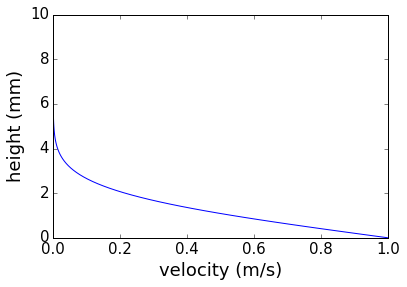

In [22]:
%matplotlib inline 
from scipy.special import erf 
import matplotlib.pyplot as plt
import numpy as np
import math
from ipywidgets import interact
import ipywidgets as widgets

mu=1e-3
rho=1e3
U=1
y=np.linspace(0,1e-2,100)

def plotstokes1(t):
    u=U*(1-erf(y/(2.*(mu/rho*t)**.5)))
    plt.plot(u,y*1e3)
    plt.xlabel(r'velocity (m/s)',size=18);plt.ylabel(r'height (mm)',size=18);
    plt.tick_params(labelsize=15)

interact(plotstokes1, t=widgets.FloatSlider(min=0.1,max=5,step=.1,value=1.,\
                                            description='t (s)'));

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom2.css", "r").read()
    return HTML(styles)
css_styling()